# 1. Uvod

In [34]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import datasets
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

# 2. Učitavanje podataka

In [35]:
#df=pd.read_csv("Wine.csv")
#df.info()

#df=datasets.load_boston()

df=pd.read_excel('Residential-Building-Data-set.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Columns: 109 entries, START YEAR to V-10
dtypes: float64(94), int64(15)
memory usage: 316.9 KB


In [36]:
#df["Customer_Segment"].unique()

In [37]:
#X = df.drop("Customer_Segment",axis=1)
#y = df["Customer_Segment"]

#X=df.data
#y=df.target

X=df.drop(['V-9','V-10'],axis=1)
y=df['V-9']

In [38]:
len(y.unique())

117

# 3. Redukcija dimenzionalnosti

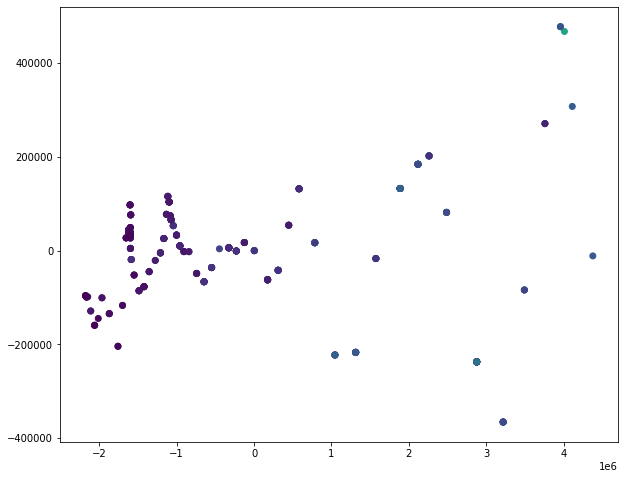

In [39]:
X_pca=decomposition.PCA(n_components='mle',svd_solver='auto').fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.show()

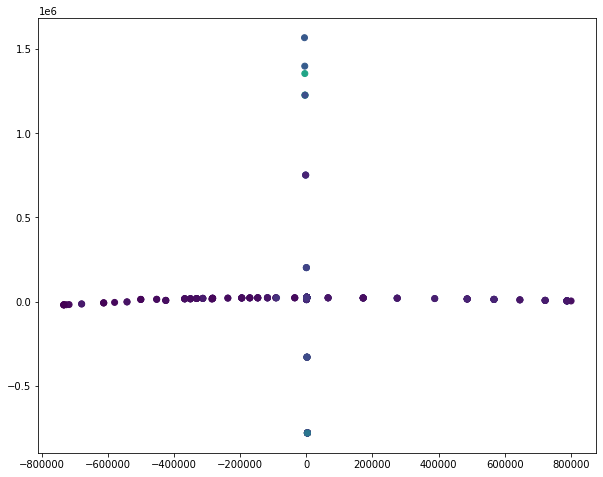

In [45]:
embedding=Isomap(n_components=2,n_neighbors=10)
X_isomap=embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

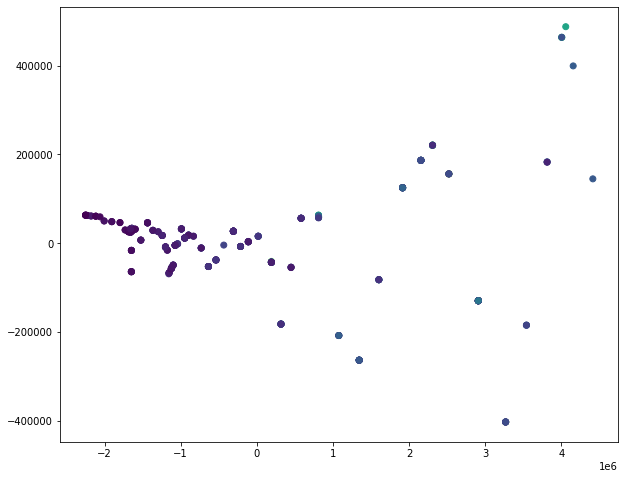

In [46]:
embedding=Isomap(n_components=2,n_neighbors=100)
X_isomap=embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

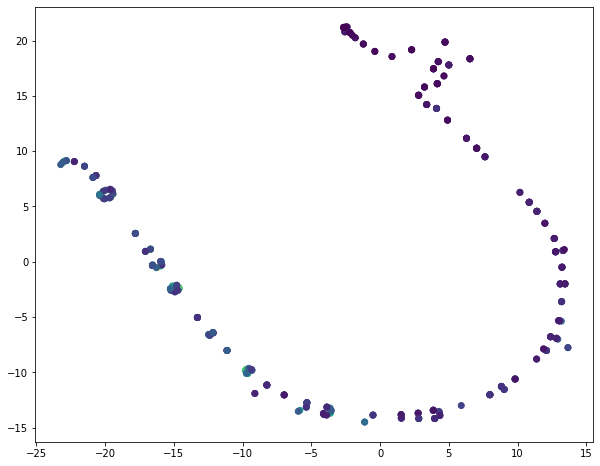

In [47]:
RS = 20150101
X_tsne = TSNE(random_state=RS,learning_rate=5,metric="euclidean").fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

# 4. Vizuelizacija odnosa redukcije dimenzionalnosti

<Figure size 432x288 with 0 Axes>

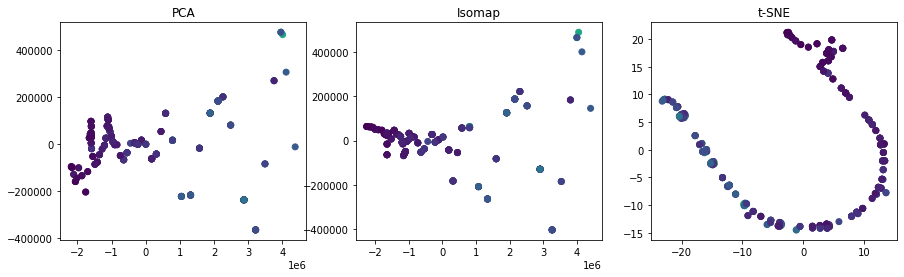

In [49]:
fig = plt.figure(figsize=(6, 4))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
_ = ax1.set_title('PCA')
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
_ = ax2.set_title('Isomap')
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
_ = ax3.set_title('t-SNE')

plt.show()